In [6]:
import pandas as pd
import os

In [7]:
folder = 'D:\MindX\D4E'
file1 = 'mexico-real-estate-1.csv'
file2 = 'mexico-real-estate-2.csv'
file3 = 'mexico-real-estate-3.csv'

In [8]:
mx1 = pd.read_csv(os.path.join(folder,file1))
mx1['price_usd'] = mx1['price_usd'].str.replace('$','').str.replace(',','').astype('float')
mx1

C:\Users\hieudd\AppData\Local\Temp/ipykernel_25652/2757214343.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mx1['price_usd'] = mx1['price_usd'].str.replace('$','').str.replace(',','').astype('float')


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,94835.67
...,...,...,...,...,...,...
695,house,Morelos,NaN,NaN,310.0,237089.17
696,house,Yucatán,21.050653,-89.558841,334.0,137017.34
697,house,Yucatán,21.343796,-89.262060,130.0,110404.35
698,apartment,Nuevo León,NaN,NaN,155.0,184446.42


In [9]:
mx2 = pd.read_csv(os.path.join(folder,file2))
mx2.rename(columns={'price_mxn':'price_usd'},inplace=True)
mx2

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
1,apartment,Puebla,NaN,NaN,190.0,2500000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
3,house,Morelos,NaN,NaN,76.0,820000.0
4,house,Puebla,NaN,NaN,200.0,1100000.0
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140.0,1450000.0
696,house,Distrito Federal,19.472128,-99.146697,190.0,1943000.0
697,house,Estado de México,19.234984,-99.558175,115.0,2100000.0
698,house,Puebla,18.918714,-98.426639,90.0,890000.0


In [10]:
mx3 = pd.read_csv(os.path.join(folder,file3))
mx3['state'] = mx3['place_with_parent_names'].str.split('|', expand=True)[2]
mx3['lat'] = mx3['lat-lon'].str.split(',', expand=True)[0]
mx3['lon'] = mx3['lat-lon'].str.split(',', expand=True)[1]
mx3 = mx3[mx2.columns.to_list()]
mx3

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Distrito Federal,19.52589,-99.151703,71.0,48550.59
1,house,Estado de México,19.2640539,-99.5727534,233.0,168636.73
2,house,Estado de México,19.268629,-99.671722,300.0,86932.69
3,house,Morelos,NaN,NaN,275.0,263432.41
4,apartment,Veracruz de Ignacio de la Llave,19.511938,-96.871956,84.0,68508.67
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.9289862,-99.1802147,100.0,47417.83
697,house,Yucatán,21.0284038368,-89.6530058049,81.0,39524.23
698,house,San Luis Potosí,22.11830417,-101.0321938992,360.0,245050.24


In [14]:
mx = pd.concat([mx1, mx2])
mx = pd.concat([mx, mx3])
mx['lat'] = mx['lat'].astype('float')
mx['lon'] = mx['lon'].astype('float')
mx

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,94835.67
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.928986,-99.180215,100.0,47417.83
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24


In [15]:
mx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  2100 non-null   object 
 1   state          2100 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        2100 non-null   float64
 5   price_usd      2100 non-null   float64
dtypes: float64(4), object(2)
memory usage: 114.8+ KB


In [16]:
mx[mx['lat'].isnull()]

,property_type,state,lat,lon,area_m2,price_usd
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,94835.67
7,house,Querétaro,NaN,NaN,202.0,43202.91
8,house,Nuevo León,NaN,NaN,90.0,34254.33
30,apartment,Guerrero,NaN,NaN,150.0,102763.00
32,house,Morelos,NaN,NaN,170.0,118544.58
...,...,...,...,...,...,...
657,house,Chihuahua,NaN,NaN,251.0,105397.95
665,apartment,Puebla,NaN,NaN,212.0,293358.34
670,house,Puebla,NaN,NaN,243.0,153317.66
671,apartment,Yucatán,NaN,NaN,200.0,252895.12


<function matplotlib.pyplot.show(close=None, block=None)>

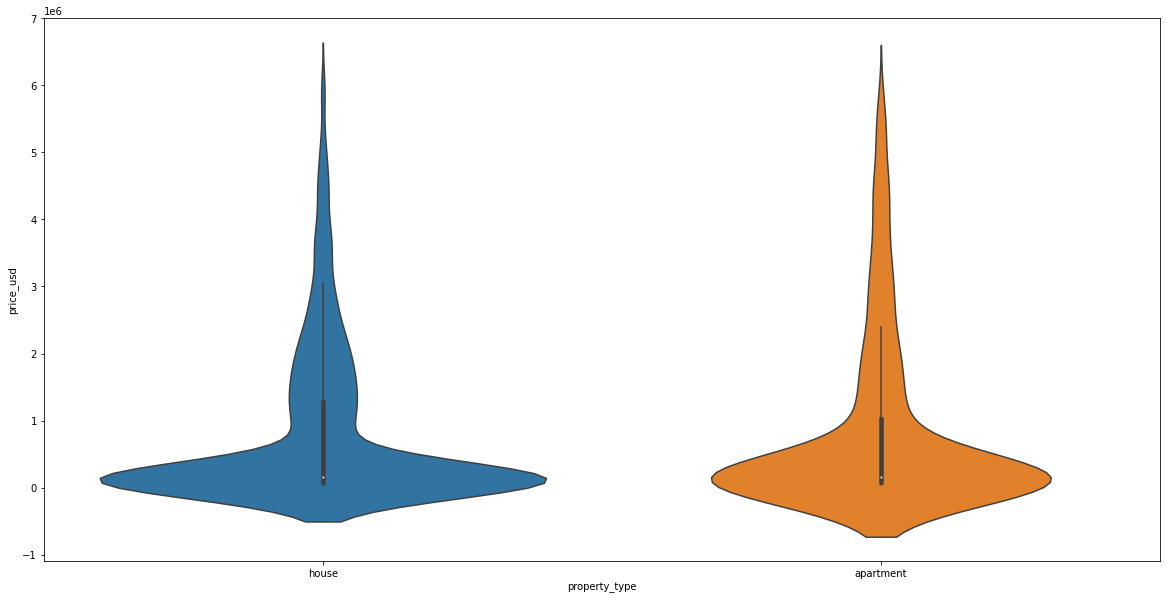

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('w')

sns.violinplot(x=mx["property_type"], y=mx["price_usd"])

plt.show 


<function matplotlib.pyplot.show(close=None, block=None)>

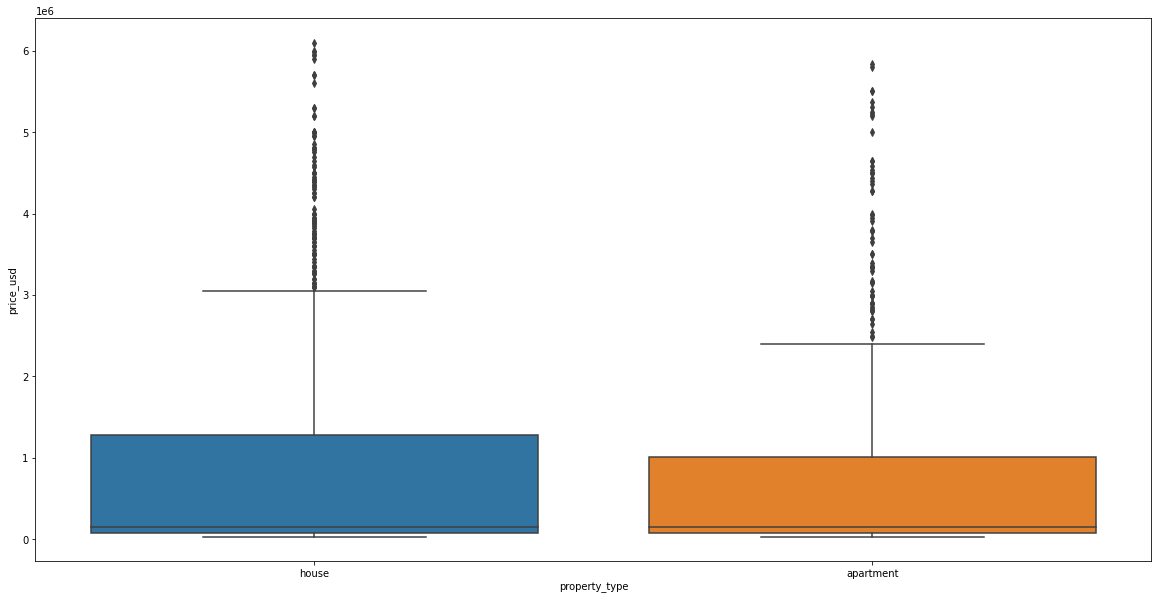

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('w')

sns.boxplot(x=mx["property_type"], y=mx["price_usd"])

plt.show 
